<a href="https://colab.research.google.com/github/bnv20/cakd3/blob/main/dl_classifying_movie_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


num_words=10000은 훈련 데이터에서 자주 나타나는 단어 10000개만 사용

In [ ]:
print(train_data[0])
print(len(train_data[0]))
print(train_data.shape)
print(train_data[:5])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
218
(25000,)
[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385,

In [ ]:
train_labels[0]

1

In [ ]:
import numpy as np
np.sort([max(sequence) for sequence in train_data])

array([ 394,  653,  824, ..., 9999, 9999, 9999])

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences),dimension))
  for i,sequence in enumerate(sequences):
    results[i,sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
len(x_train[0])

10000

In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
x_val = x_train[:10000]
partial_x_train=x_train[10000:]
y_val = y_train[:10000]
partial_y_train=y_train[10000:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 2s 23ms/step - loss: 0.5027 - accuracy: 0.7893 - val_loss: 0.4172 - val_accuracy: 0.8329
Epoch 2/20
30/30 [==============================] - 0s 9ms/step - loss: 0.3014 - accuracy: 0.9044 - val_loss: 0.3250 - val_accuracy: 0.8696
Epoch 3/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2212 - accuracy: 0.9263 - val_loss: 0.3037 - val_accuracy: 0.8766
Epoch 4/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1739 - accuracy: 0.9457 - val_loss: 0.3243 - val_accuracy: 0.8696
Epoch 5/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1392 - accuracy: 0.9563 - val_loss: 0.3129 - val_accuracy: 0.8793
Epoch 6/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1153 - accuracy: 0.9645 - val_loss: 0.3069 - val_accuracy: 0.8841
Epoch 7/20
30/30 [==============================] - 0s 9ms/step - loss: 0.0926 - accuracy: 0.9734 - val_loss: 0.3652 - val_accuracy: 0.8661
Epoch 8/20
30/30 [

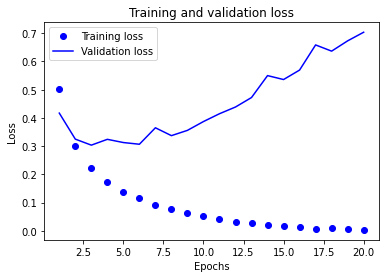

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

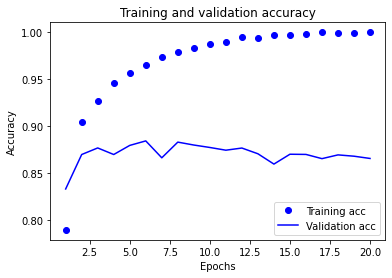

In [ ]:


plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train,y_train,epochs=4,batch_size=512)
results = model.evaluate(x_test,y_test)

Epoch 1/4
49/49 [==============================] - 1s 6ms/step - loss: 0.4695 - accuracy: 0.8099
Epoch 2/4
49/49 [==============================] - 0s 7ms/step - loss: 0.2660 - accuracy: 0.9088
Epoch 3/4
49/49 [==============================] - 0s 7ms/step - loss: 0.2011 - accuracy: 0.9289
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.3197 - accuracy: 0.8724


In [ ]:
results

[0.31965649127960205, 0.8723999857902527]

In [ ]:
model.predict(x_test)

array([[0.27715933],
       [0.9991768 ],
       [0.9512612 ],
       ...,
       [0.19009951],
       [0.09298164],
       [0.8618645 ]], dtype=float32)